In [ ]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.tree as tree
import csv

In [43]:
# Import data and upload file
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]
data = pd.read_csv(filename)
data.head()


Saving youtube_channel_real_performance_analytics.csv to youtube_channel_real_performance_analytics (1).csv


,ID,Video Duration,Video Publish Time,Days Since Publish,Day,Month,Year,Day of Week,Revenue per 1000 Views (USD),Monetized Playbacks (Estimate),...,Watched (Not Skipped) (%),Feed Impressions,Average View Percentage (%),Average View Duration,Views,Watch Time (hours),Subscribers,Estimated Revenue (USD),Impressions,Video Thumbnail CTR (%)
0,0,201.0,2016-06-02 00:00:00,0,2,6,2016,Thursday,0.024,723.0,...,0.0,0.0,40.38,81.0,23531.0,533.1636,51.0,0.561,41118.0,27.66
1,1,391.0,2016-06-10 00:00:00,8,10,6,2016,Friday,0.056,727.0,...,0.0,0.0,39.85,156.0,11478.0,500.5628,33.0,0.648,41627.0,5.85
2,2,133.0,2016-06-14 00:00:00,4,14,6,2016,Tuesday,0.014,76.0,...,0.0,0.0,30.88,41.0,6153.0,70.7287,8.0,0.089,38713.0,7.07
3,3,14.0,2016-06-29 00:00:00,15,29,6,2016,Wednesday,0.004,18.0,...,0.0,0.0,103.05,14.0,4398.0,17.6251,2.0,0.017,35245.0,5.60
4,4,45.0,2016-07-01 00:00:00,2,1,7,2016,Friday,0.000,0.0,...,0.0,0.0,55.70,25.0,14659.0,104.3341,28.0,0.000,46218.0,8.62


In [44]:
# Descriptive Analysis

columns = [
    "Views",
    "Watch Time (hours)",
    "Revenue per 1000 Views (USD)",
    "Impressions",
    "YouTube Premium Views",
    "YouTube Ads Revenue (USD)",
    "Estimated AdSense Revenue (USD)",
    "Video Thumbnail CTR (%)",
]

features = [
    'Views',
    'Watch Time (hours)',
    'YouTube\xa0Premium (USD)',
    'Impressions',

]

drops = [
    "Video Publish Time",
    "Day of Week"
]

target = "YouTube Ads Revenue (USD)"

newData = data.drop(drops, axis=1)
x = data[features]
y = data[target]
data[columns].describe()

,Views,Watch Time (hours),Revenue per 1000 Views (USD),Impressions,YouTube Premium Views,YouTube Ads Revenue (USD),Estimated AdSense Revenue (USD),Video Thumbnail CTR (%)
count,364.000000,364.000000,364.000000,3.640000e+02,364.000000,364.000000,364.000000,364.000000
mean,128800.101648,10058.965455,0.112283,9.595286e+05,1303.763736,15.363964,7.811525,7.914615
std,118209.844270,9516.160361,0.179668,1.180519e+06,1343.028080,23.614172,12.778813,2.903383
min,2461.000000,12.697900,0.000000,3.222800e+04,0.000000,0.000000,0.000000,0.620000
25%,27160.500000,2759.404250,0.015000,1.317082e+05,170.500000,0.344500,0.167000,6.420000
50%,101950.500000,8102.962950,0.050000,6.204065e+05,958.000000,7.527500,3.329500,8.395000
75%,198169.500000,14084.498550,0.143500,1.368464e+06,2011.500000,20.071750,10.195500,9.920000
max,670990.000000,53794.658700,1.600000,1.270226e+07,8633.000000,182.796000,100.564000,27.660000


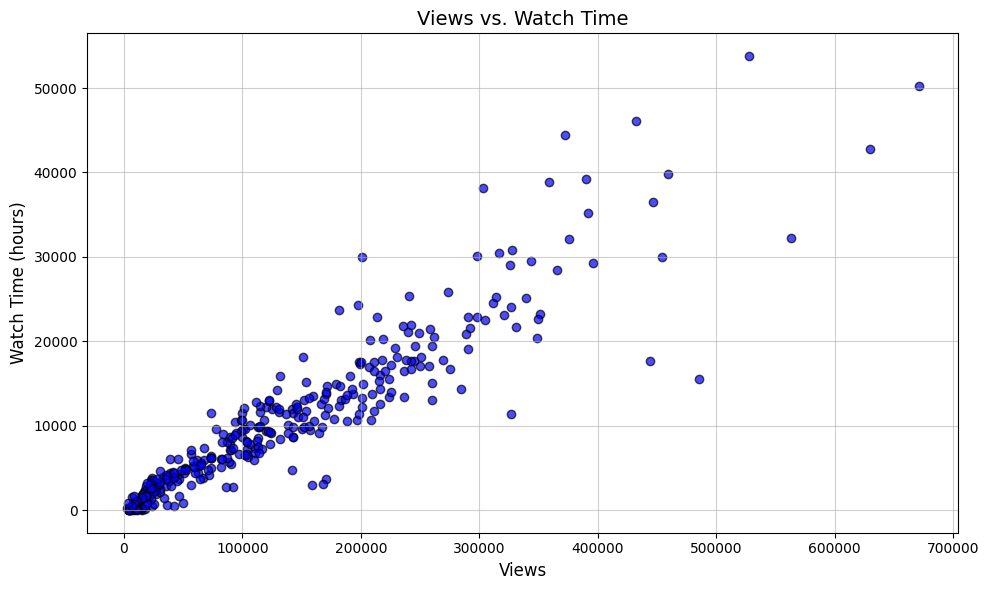

In [ ]:

# Views vs. Watch Time
plt.figure(figsize=(10, 6))
plt.scatter(data['Views'], data['Watch Time (hours)'], alpha=0.7, color='blue', edgecolors='k')
plt.title('Views vs. Watch Time', fontsize=14)
plt.xlabel('Views', fontsize=12)
plt.ylabel('Watch Time (hours)', fontsize=12)
plt.grid(True, linestyle='-', alpha=0.6)
plt.tight_layout()
plt.show()


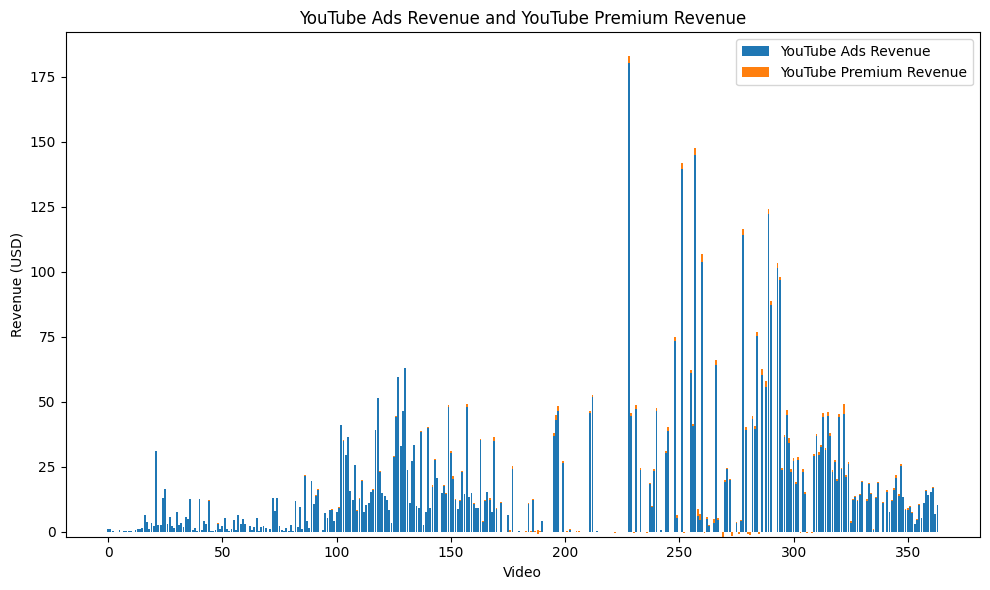

In [ ]:

premium_revenue = data['YouTube\xa0Premium (USD)']
ad_revenue = data['YouTube Ads Revenue (USD)'] - premium_revenue

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(data.index, ad_revenue, label='YouTube Ads Revenue')
ax.bar(data.index, premium_revenue, bottom=ad_revenue, label='YouTube Premium Revenue')

ax.set_xlabel('Video')
ax.set_ylabel('Revenue (USD)')
ax.set_title('YouTube Ads Revenue and YouTube Premium Revenue')

ax.legend()

plt.tight_layout()
plt.show()


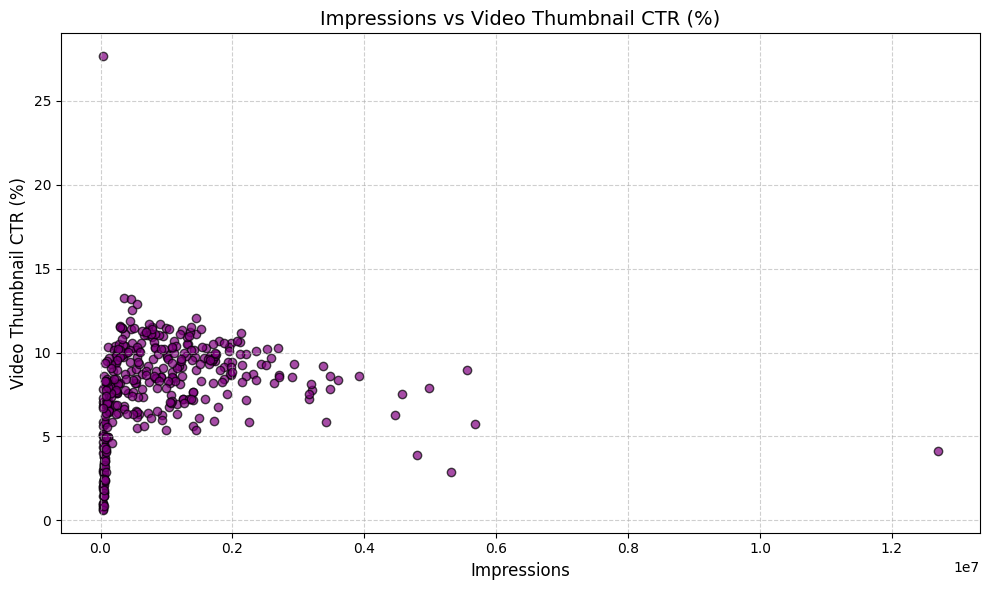

In [ ]:


# Scatter plot for Impressions vs Video Thumbnail CTR (%)
plt.figure(figsize=(10, 6))
plt.scatter(data['Impressions'], data['Video Thumbnail CTR (%)'], alpha=0.7, color='purple', edgecolors='k')
plt.title('Impressions vs Video Thumbnail CTR (%)', fontsize=14)
plt.xlabel('Impressions', fontsize=12)
plt.ylabel('Video Thumbnail CTR (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


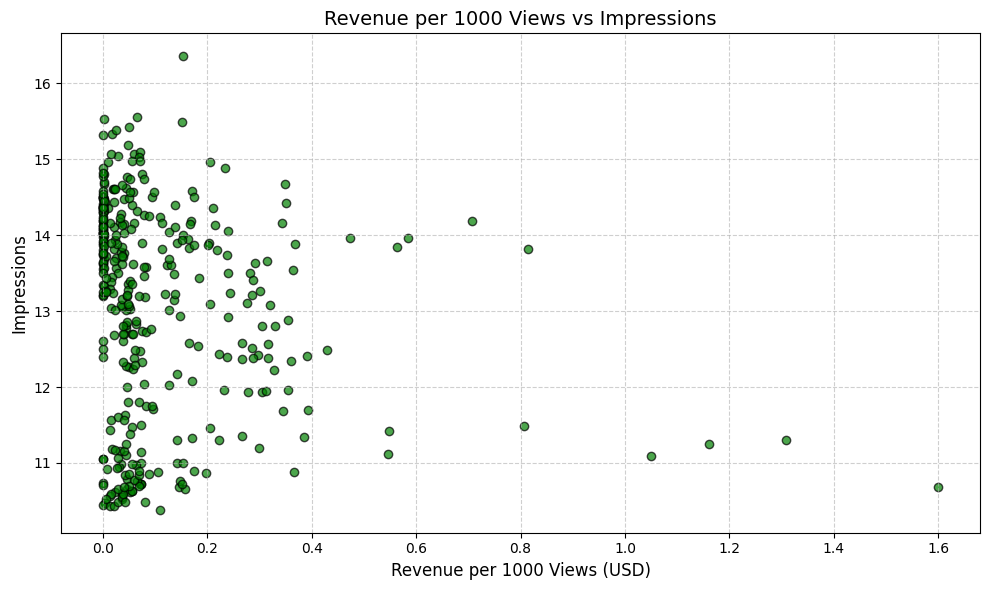

In [ ]:


# Scatter plot for Revenue per 1000 Views vs Impressions
plt.figure(figsize=(10, 6))
plt.scatter(data['Revenue per 1000 Views (USD)'], np.log1p(data['Impressions']), alpha=0.7, color='green', edgecolors='k')
plt.title('Revenue per 1000 Views vs Impressions', fontsize=14)
plt.ylabel('Impressions', fontsize=12)
plt.xlabel('Revenue per 1000 Views (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


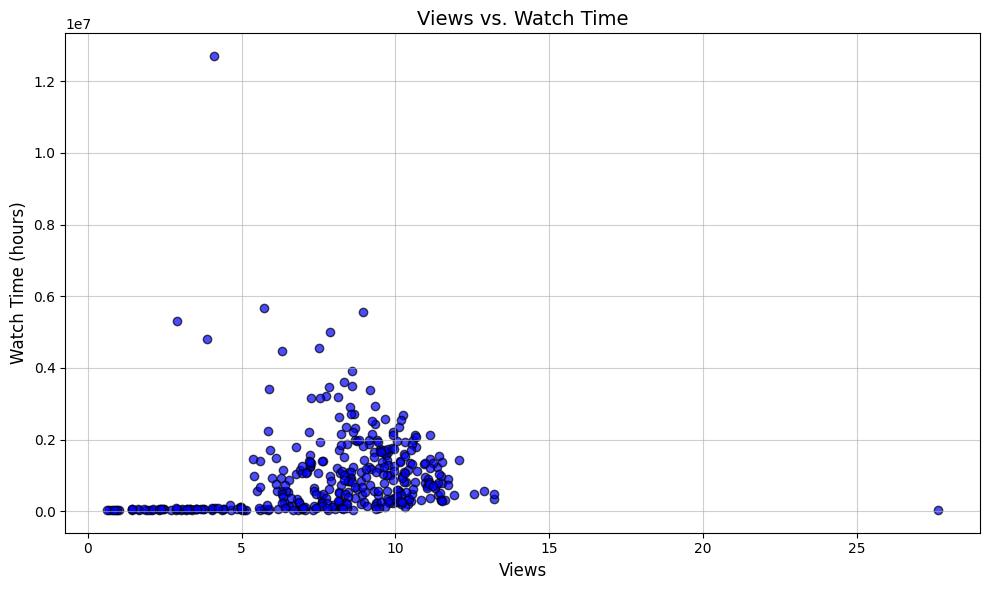

In [ ]:
# Views vs. Watch Time
plt.figure(figsize=(10, 6))
plt.scatter(data['Video Thumbnail CTR (%)'], data['Impressions'], alpha=0.7, color='blue', edgecolors='k')
plt.title('Views vs. Watch Time', fontsize=14)
plt.xlabel('Views', fontsize=12)
plt.ylabel('Watch Time (hours)', fontsize=12)
plt.grid(True, linestyle='-', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
#PCA Analysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = newData


pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])
finalDF = pd.concat([principalDf, data['Day of Week']], axis = 1)


# Figure out how many components are needed
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
n_components_96 = np.argmax(cumulative_variance >= 0.96) + 1

#Plot PCA graph
finalDF.head()


,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,Day of Week
0,-924262.575016,-25080.035343,-8015.957277,-6341.994132,1770.069291,Thursday
1,-924808.237193,-37060.276009,-7433.282939,-7449.168095,1810.771370,Friday
2,-928186.583549,-42158.983370,-8075.130371,-7747.355403,1839.597521,Tuesday
3,-931795.093444,-43598.694782,-8032.324173,-7862.403230,1842.642870,Wednesday
4,-919969.479695,-34403.311266,-8703.310118,-7026.537266,1835.171742,Friday


from matplotlib import pyplot as plt
_df_0['principal component 1'].plot(kind='hist', bins=20, title='principal component 1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['principal component 2'].plot(kind='hist', bins=20, title='principal component 2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['principal component 3'].plot(kind='hist', bins=20, title='principal component 3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['principal component 4'].plot(kind='hist', bins=20, title='principal component 4')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Day of Week').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='principal component 1', y='principal component 2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='principal component 2', y='principal component 3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='principal component 3', y='principal component 4', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='principal component 4', y='principal component 5', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['principal component 1'].plot(kind='line', figsize=(8, 4), title='principal component 1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['principal component 2'].plot(kind='line', figsize=(8, 4), title='principal component 2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['principal component 3'].plot(kind='line', figsize=(8, 4), title='principal component 3')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['principal component 4'].plot(kind='line', figsize=(8, 4), title='principal component 4')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['Day of Week'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='principal component 1', y='Day of Week', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['Day of Week'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='principal component 2', y='Day of Week', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['Day of Week'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='principal component 3', y='Day of Week', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['Day of Week'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='principal component 4', y='Day of Week', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

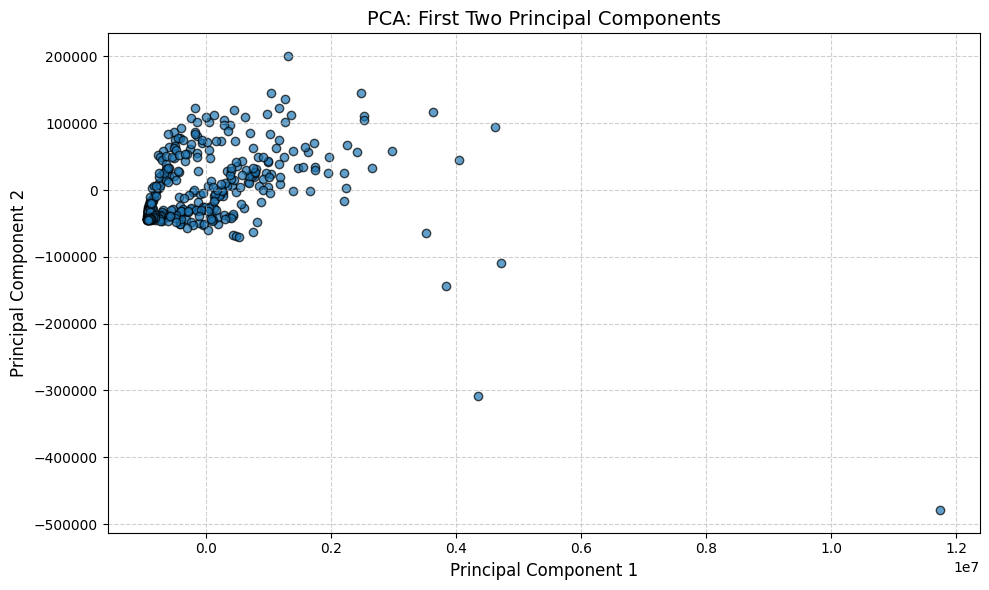

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Scatter plot for the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], alpha=0.7, edgecolors='k')
plt.title('PCA: First Two Principal Components', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.metrics import r2_score


est = tree.DecisionTreeRegressor(max_depth=3)
est.fit(X_train, y_train)
y_pred = est.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))

R2 Score: 0.20359702609942631


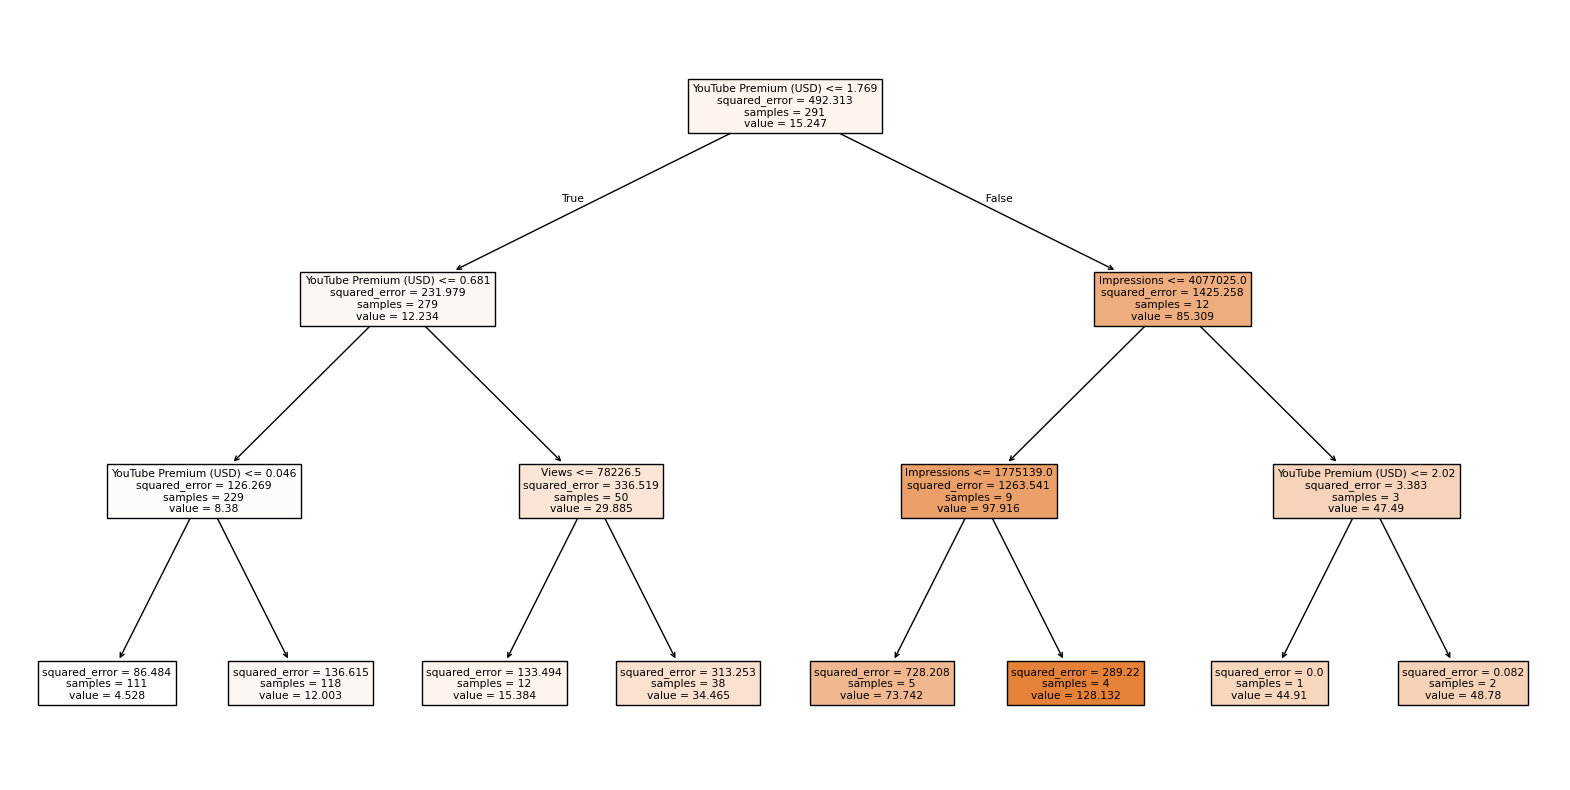

In [ ]:
# Plot Tree

plt.figure( figsize=(20,10))
feature_names = X_train.columns.tolist()

_ = tree.plot_tree( est,
                    feature_names=feature_names,

                    filled = True )

Hypothesis 1: Youtube Videos with higher views, impressions and watch time generate higher youtube ad revenue with features such as premium views influencing this prediction

In [ ]:


from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Random Forest Model

rf = RandomForestRegressor(max_features=4)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

# Gradient Booster Model

clf = GradientBoostingRegressor(n_estimators=100)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

# Grid Search Random Forest

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],

}

grid_rf = GridSearchCV(rf,cv=3,scoring='r2',param_grid=param_grid_rf)
grid_rf.fit(X_train, y_train)

y_pred = grid_rf.predict(X_test)
print("Random Forest R2 Score:", r2_score(y_test, y_pred))
print("Random forest best parameters:", grid_rf.best_params_)

# Grid Search Gradient booster

param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1,2,4]
}

grid_gb = GridSearchCV(clf,cv=3,scoring='r2',param_grid=param_grid_gb)
grid_gb.fit(X_train, y_train)

print("Gradient booster best parameters:", grid_gb.best_params_)

y_pred = grid_gb.predict(X_test)
print("Gradient booster R2 Score:", r2_score(y_test, y_pred))



R2 Score: 0.8116705033254247
MSE: 152.56336148926857
MAE: 4.595147123287671
R2 Score: 0.9078739702714582
MSE: 74.63014038811515
MAE: 3.4789005975162106
Random Forest R2 Score: 0.8071995883205245
Random forest best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Gradient booster best parameters: {'learning_rate': 0.2, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
Gradient booster R2 Score: 0.928016777579693


In [ ]:
from sklearn.neural_network import MLPRegressor
# MLP Regressor

mlp = MLPRegressor(max_iter=1000)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))

# Grid Search

mlp_params = {
    'hidden_layer_sizes': [(50, 50), (100,), (100, 100)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive']
}

grid_mlp = GridSearchCV(mlp, cv=3, scoring='r2', param_grid=mlp_params)
grid_mlp.fit(X_train, y_train)

y_pred = grid_mlp.predict(X_test)
print("MLP R2 Score:", r2_score(y_test, y_pred))
print("MLP best parameters:", grid_mlp.best_params_)

R2 Score: -990825.5528642192
MLP R2 Score: 0.13587378722467192
MLP best parameters: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'adam'}


In [ ]:
# New MLP Regressor with Standardization and Cross Validation

scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

grid_mlp = GridSearchCV(mlp, cv=3, scoring='r2', param_grid=mlp_params)
grid_mlp.fit(X_train, y_train)

y_pred = grid_mlp.predict(X_test)
print("MLP R2 Score:", r2_score(y_test, y_pred))
print("MLP best parameters:", grid_mlp.best_params_)

from sklearn.model_selection import cross_val_score, KFold
KFold = KFold(n_splits=5, shuffle=True, random_state=42)
mlp_simple = MLPRegressor(
    activation='relu',  # Use ReLU for faster training
    alpha=0.001,        # Regularization strength
    hidden_layer_sizes=(25, 25),  # Smaller architecture
    learning_rate='adaptive',  # Adjust learning rate dynamically
    solver='adam',  # Efficient optimizer
    max_iter=1000,  # Reasonable iterations
    random_state=42
)
# Perform cross-validation
cv_scores = cross_val_score(mlp_simple, x, y, cv=KFold, scoring='r2')
print("Cross-Validation Mean R2:", np.mean(cv_scores))


MLP R2 Score: 0.0043885563730112764
MLP best parameters: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
Cross-Validation Mean R2: -410807.26949248847


Hypothesis 2: Views, watch time, and impressions can predict the day of the week the video was uploaded. More Specifically, certain days are associated with having higher ad revenues

In [ ]:
# Classification

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

target = 'Day of Week'
features = [
    'Views',
    'Watch Time (hours)',
    'YouTube\xa0Premium (USD)',
    'Impressions',
    'Revenue per 1000 Views (USD)',
    'Playback-Based CPM (USD)',
]
x = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# Random Forest Classifier

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Classifier Accuracy:", accuracy)

# Gradient Boosting Classifier

gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)
y_pred = gb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Gradient Boosting Classifier Accuracy:", accuracy)

# MLP Classifier

mlp_classifier = MLPClassifier(random_state=42)
mlp_classifier.fit(X_train, y_train)
y_pred = mlp_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("MLP Classifier Accuracy:", accuracy)

Random Forest Classifier Accuracy: 0.0958904109589041
Gradient Boosting Classifier Accuracy: 0.1506849315068493
MLP Classifier Accuracy: 0.2602739726027397


In [ ]:
# Cross Validation on MLP Classifier

from sklearn.model_selection import cross_val_score

mlp_classifier = MLPClassifier(random_state=42)

cv_scores = cross_val_score(mlp_classifier, x, y, cv=5, scoring='accuracy')

print("Cross-Validation Mean Accuracy:", np.mean(cv_scores))

Cross-Validation Mean Accuracy: 0.19223744292237444


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

      Friday       0.27      0.21      0.24        14
      Monday       0.00      0.00      0.00         5
    Saturday       0.00      0.00      0.00        10
      Sunday       0.22      0.40      0.29        10
    Thursday       0.00      0.00      0.00         8
     Tuesday       0.00      0.00      0.00        10
   Wednesday       0.28      0.75      0.41        16

    accuracy                           0.26        73
   macro avg       0.11      0.19      0.13        73
weighted avg       0.14      0.26      0.17        73



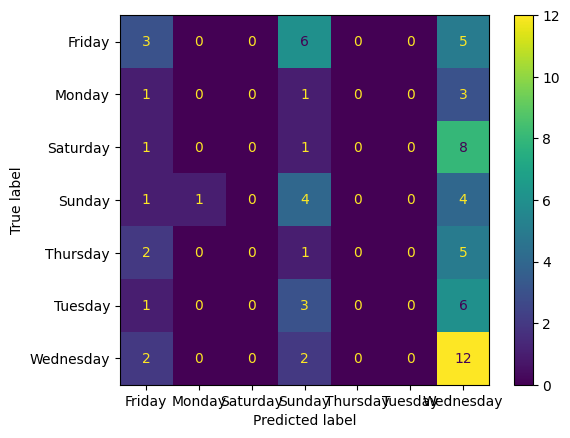

In [ ]:
# Confusion matrix for MLP Classifier

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=mlp_classifier.classes_)
disp.plot()
plt.show()
